In [ ]:
import pandas as pd
import os
import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()).parents[1]))
from src.clean import app_train_clean, app_test_clean



In [4]:
app_train_clean.dtypes

sk_id_curr                      int64
target                          int64
name_contract_type             object
code_gender                    object
flag_own_car                   object
                               ...   
amt_req_credit_bureau_day     float64
amt_req_credit_bureau_week    float64
amt_req_credit_bureau_mon     float64
amt_req_credit_bureau_qrt     float64
amt_req_credit_bureau_year    float64
Length: 122, dtype: object

### Examine target

In [5]:
app_train_clean['target'].value_counts()

0    282686
1     24825
Name: target, dtype: int64

### Number of each type od column

In [6]:
app_train_clean.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### Unique values in object columns

In [7]:
app_train_clean.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_contract_type             2
code_gender                    3
flag_own_car                   2
flag_own_realty                2
name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
fondkapremont_mode             4
housetype_mode                 3
wallsmaterial_mode             7
emergencystate_mode            2
dtype: int64

### Missing values

In [8]:
def missing_values(df):
        # Total missing values
        miss_val = df.isnull().sum()
        
        # Percentage of missing values
        miss_val_pct = 100 * miss_val / len(df)
        miss_val_df = pd.concat([miss_val, miss_val_pct], axis=1)
        
        miss_val_df.columns = ['num_miss_values', 'pct_miss_values']
        miss_val_df = miss_val_df[miss_val_df.pct_miss_values>0]
        return miss_val_df.sort_values('pct_miss_values', ascending = False)

In [9]:
missing_values(app_train_clean)

,num_miss_values,pct_miss_values
commonarea_medi,214865,69.872297
commonarea_avg,214865,69.872297
commonarea_mode,214865,69.872297
nonlivingapartments_medi,213514,69.432963
nonlivingapartments_mode,213514,69.432963
...,...,...
ext_source_2,660,0.214626
amt_goods_price,278,0.090403
amt_annuity,12,0.003902
cnt_fam_members,2,0.000650


In [10]:
app_train_clean[app_train_clean.target == 1].isnull().sum().sort_values(ascending = False)

commonarea_mode             18423
commonarea_avg              18423
commonarea_medi             18423
nonlivingapartments_mode    18327
nonlivingapartments_avg     18327
                            ...  
name_family_status              0
name_education_type             0
name_income_type                0
amt_annuity                     0
sk_id_curr                      0
Length: 122, dtype: int64

## EDA
Relation of categorical variables with target variable

From this graphs we expect to see different distributions along categories for label 1 and 0

In [11]:
categoric = list(app_train_clean.select_dtypes('object').columns)

In [19]:
categoric

['name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'occupation_type',
 'weekday_appr_process_start',
 'organization_type',
 'fondkapremont_mode',
 'housetype_mode',
 'wallsmaterial_mode',
 'emergencystate_mode']

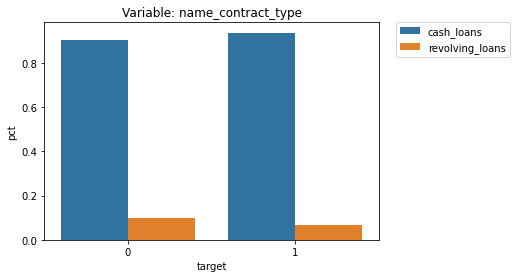

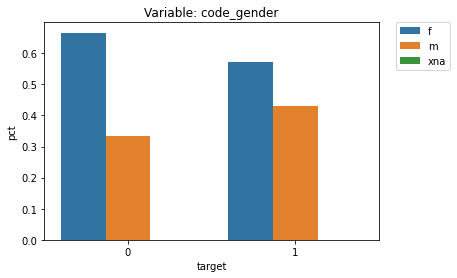

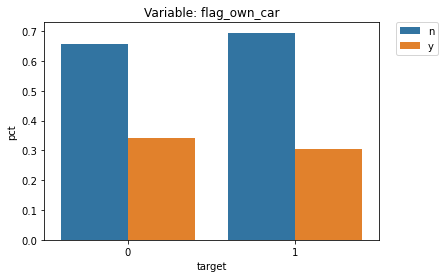

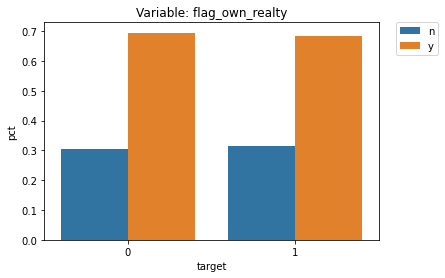

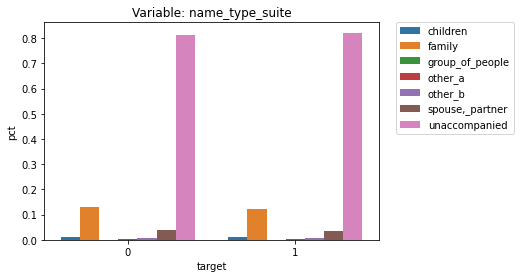

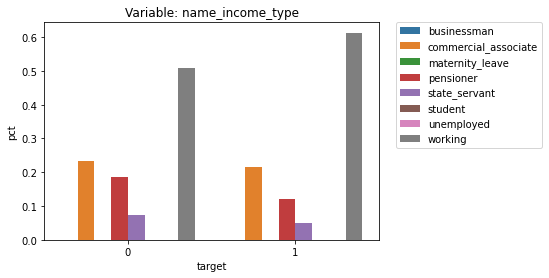

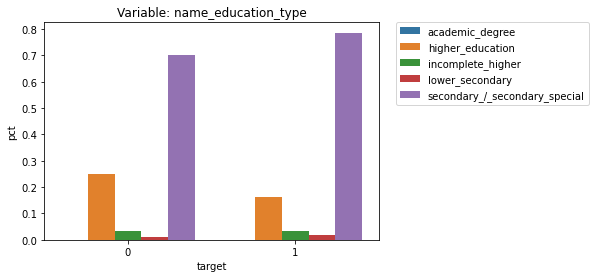

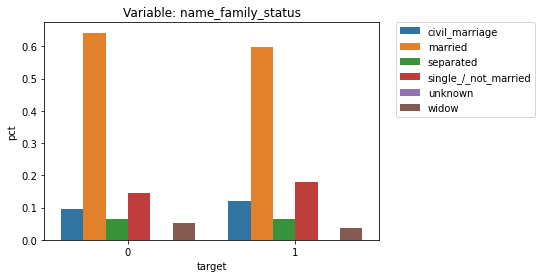

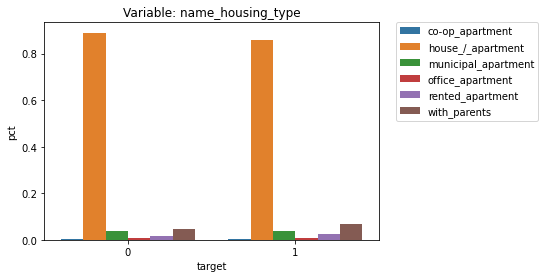

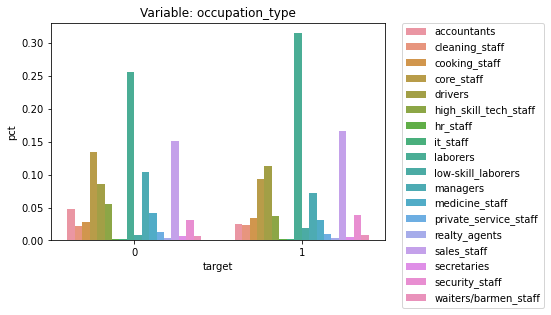

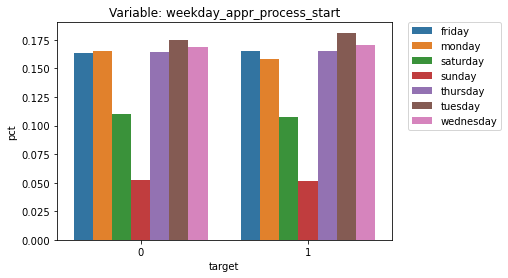

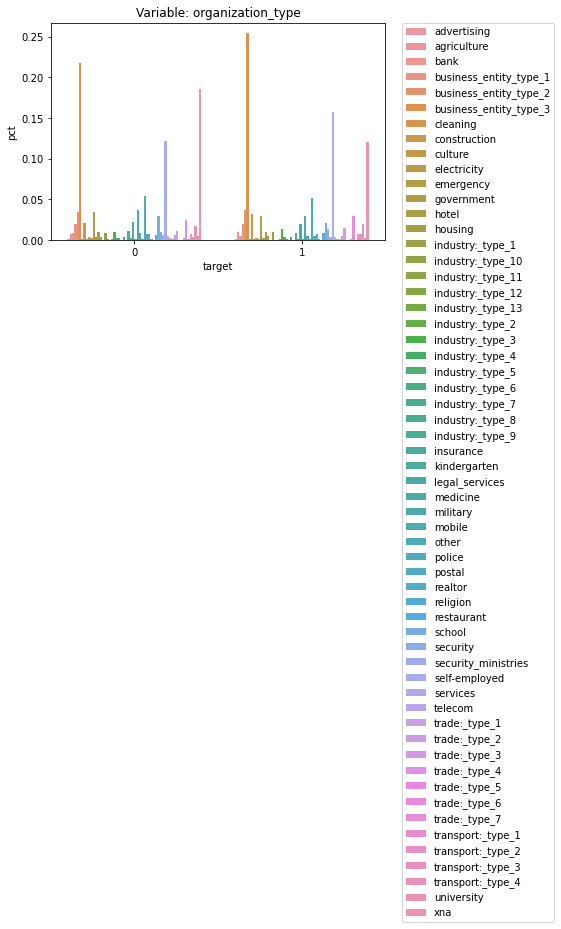

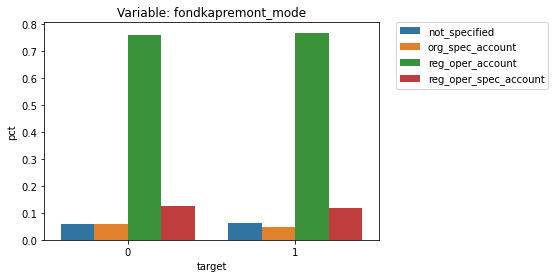

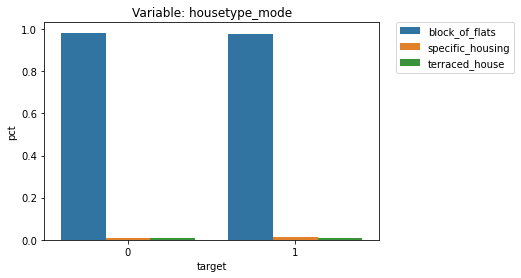

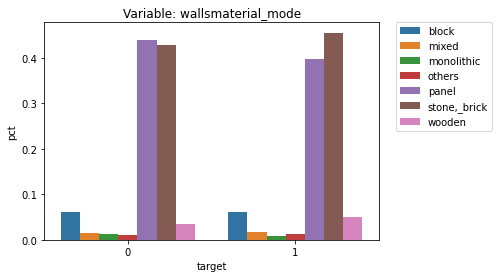

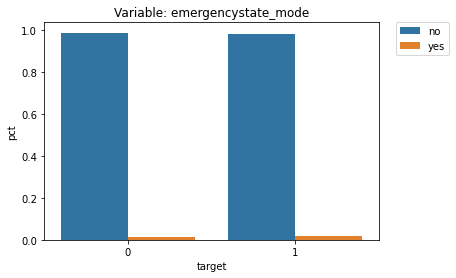

In [12]:
for var in categoric:   
    a = app_train_clean.groupby(['target',var]).size()
    b=(a / a.groupby(level=0).sum()).rename('pct').reset_index()
    ax = sns.barplot(x="target", y='pct', hue=var, data=b)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_title(f"Variable: {var}")
    plt.show()

In [15]:
numeric = list(app_train_clean.select_dtypes(exclude=['object']).columns)

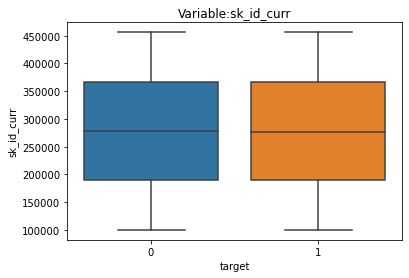

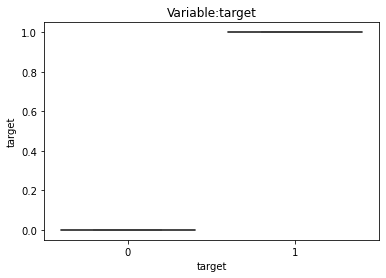

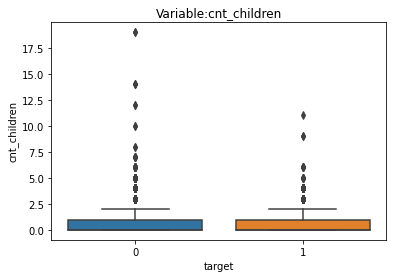

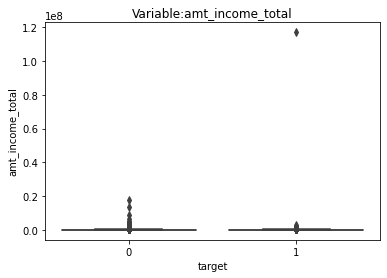

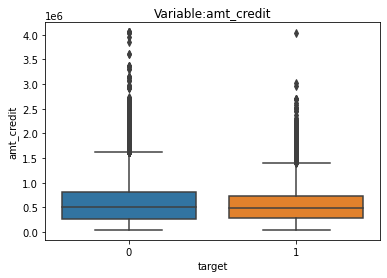

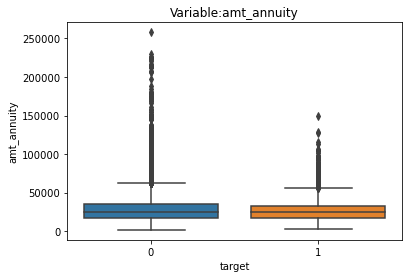

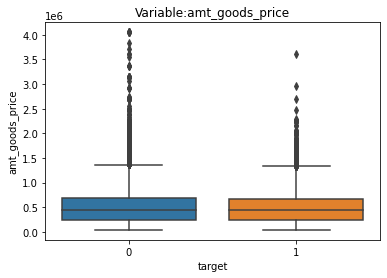

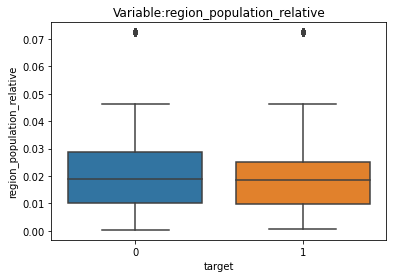

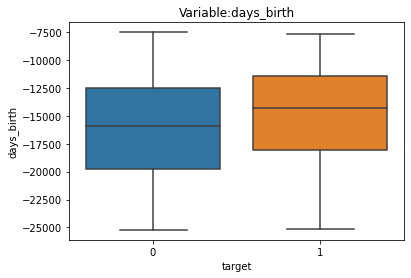

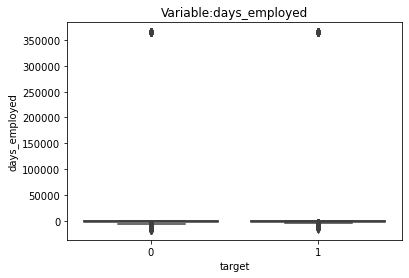

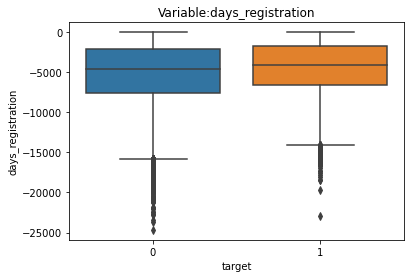

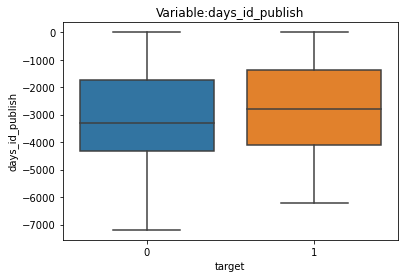

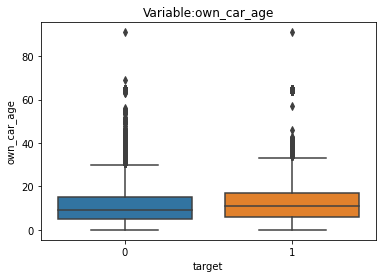

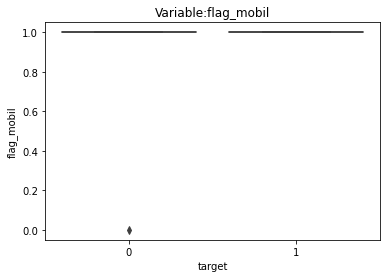

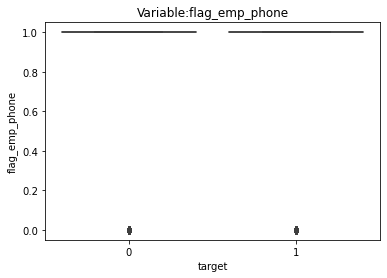

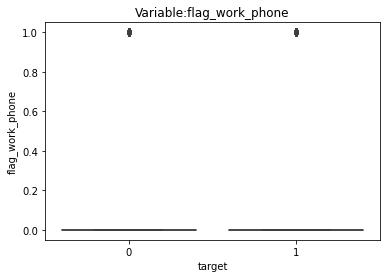

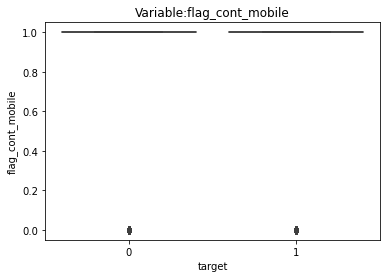

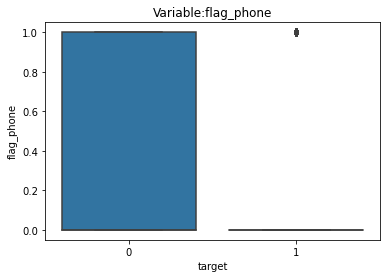

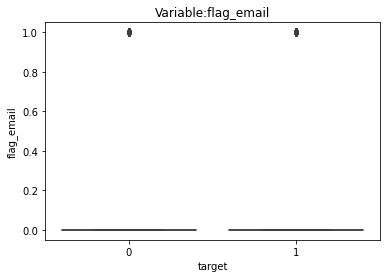

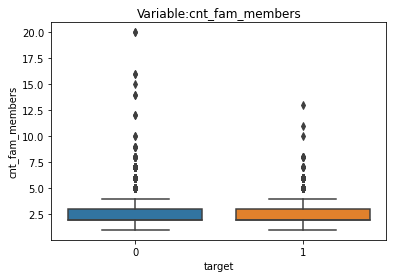

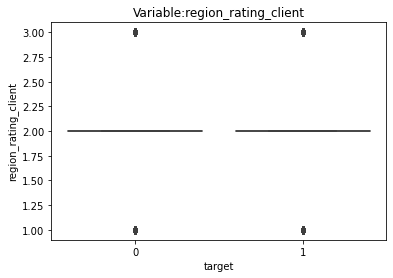

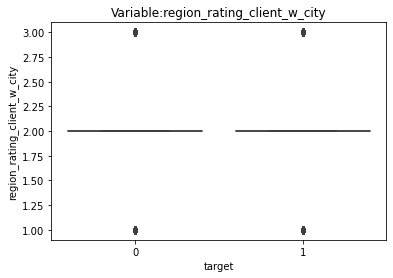

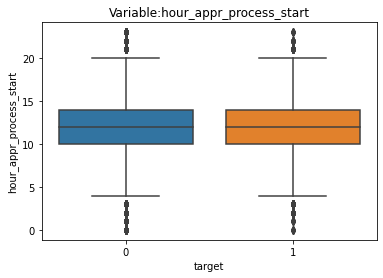

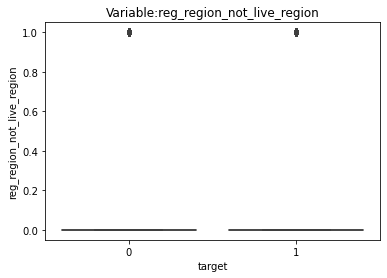

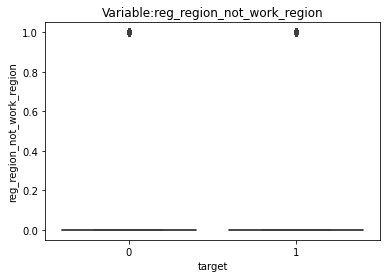

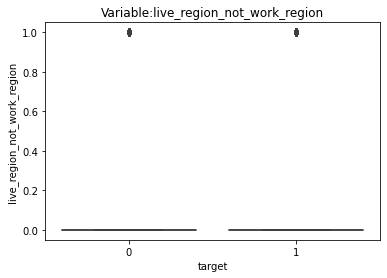

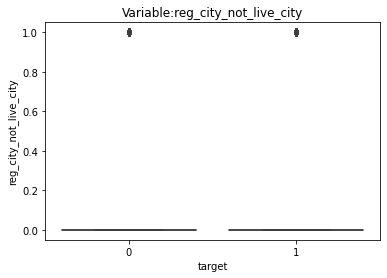

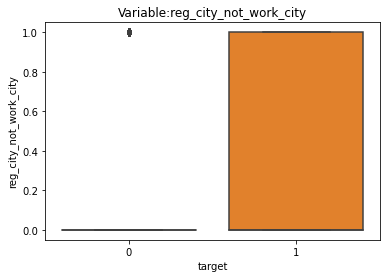

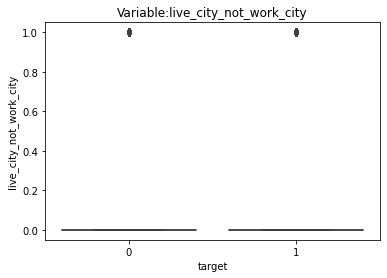

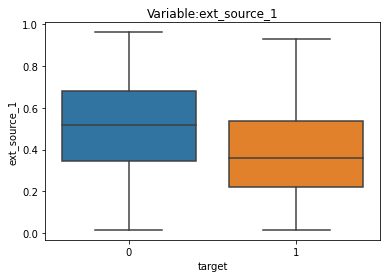

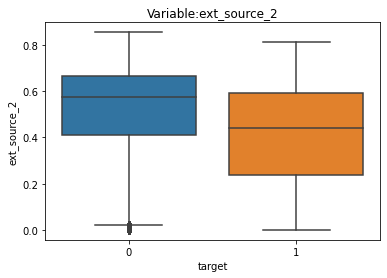

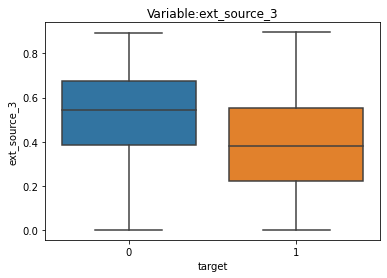

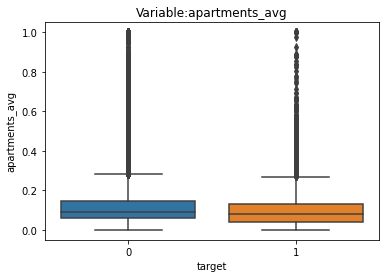

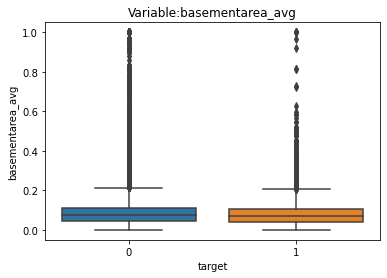

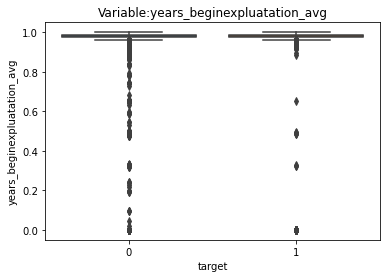

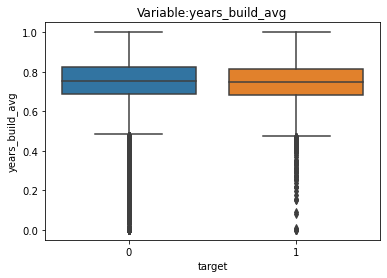

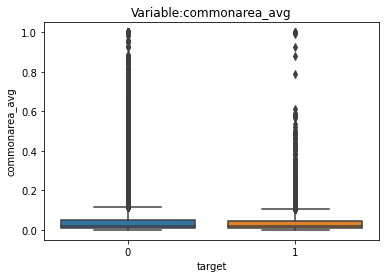

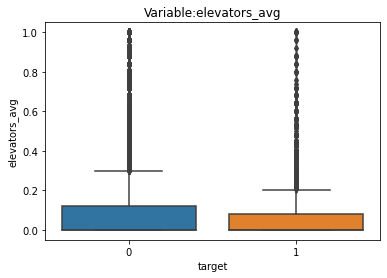

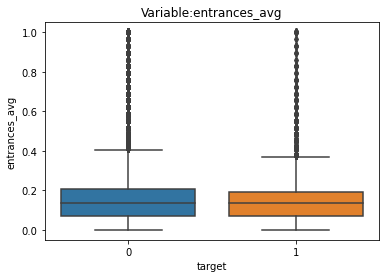

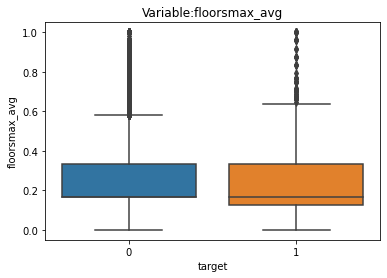

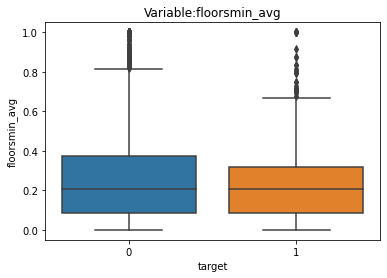

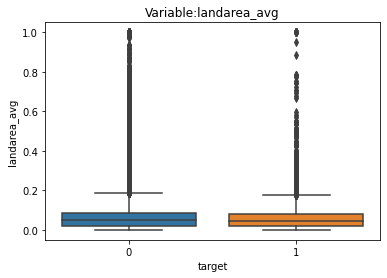

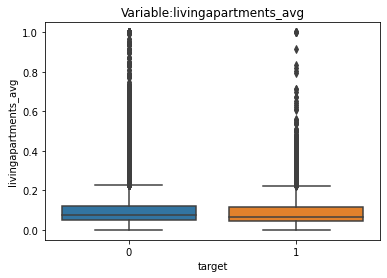

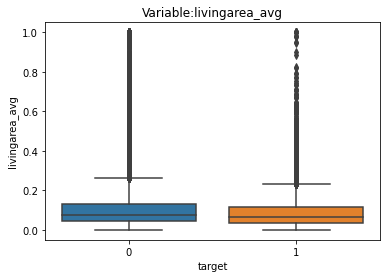

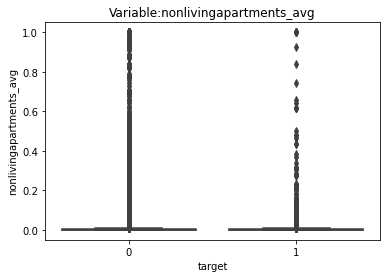

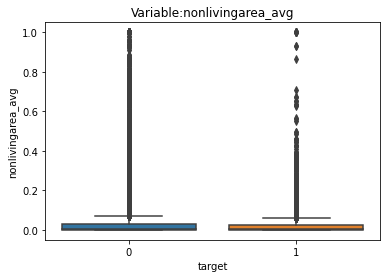

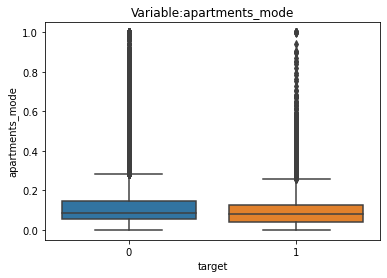

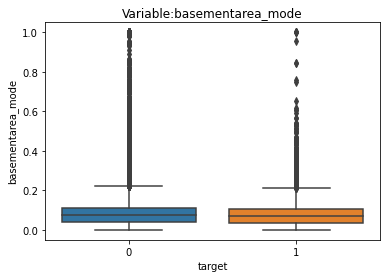

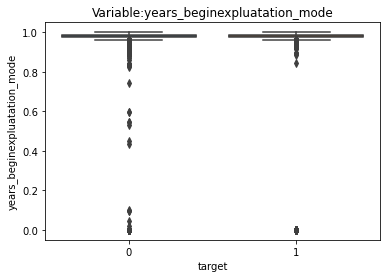

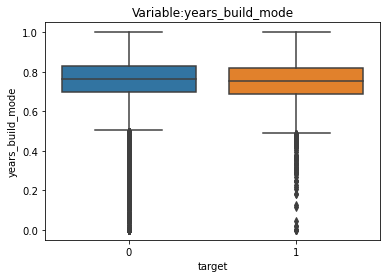

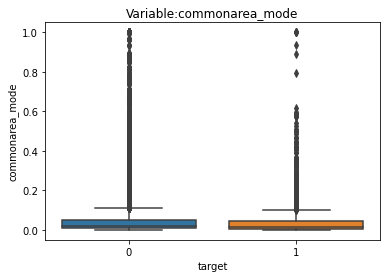

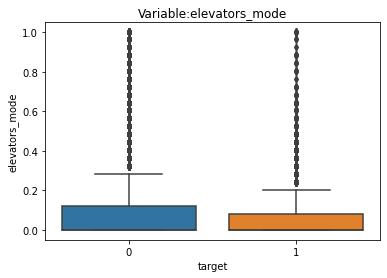

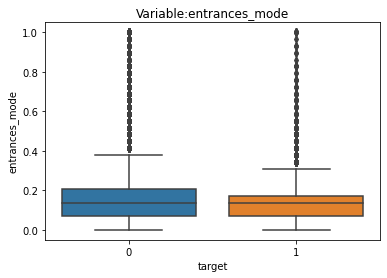

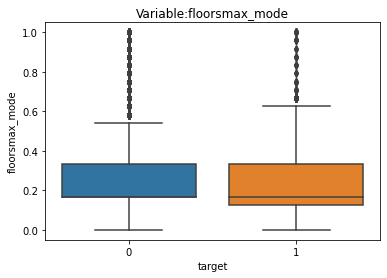

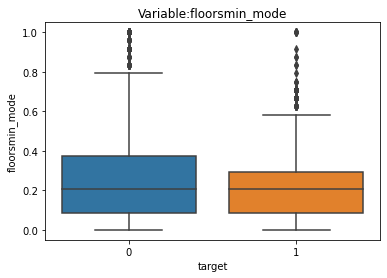

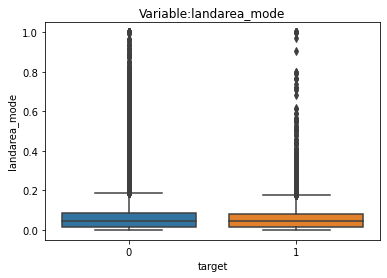

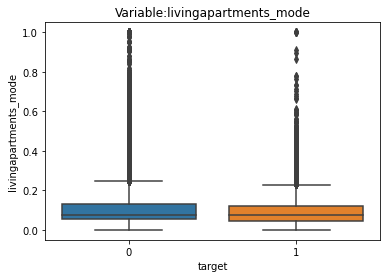

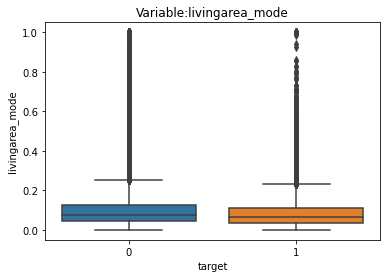

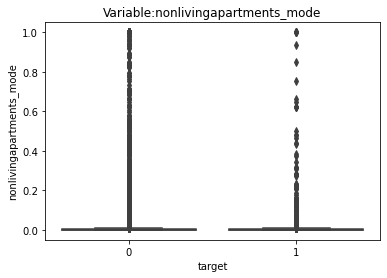

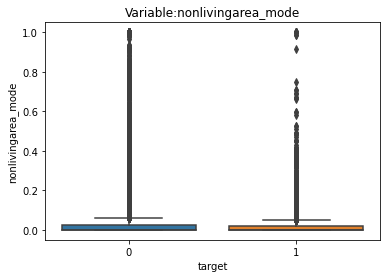

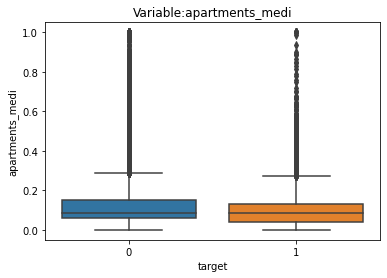

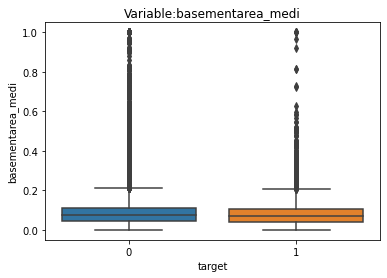

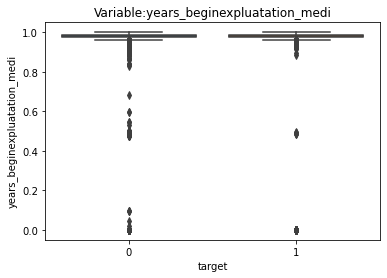

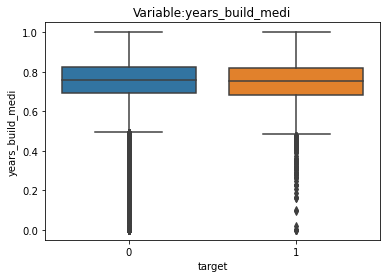

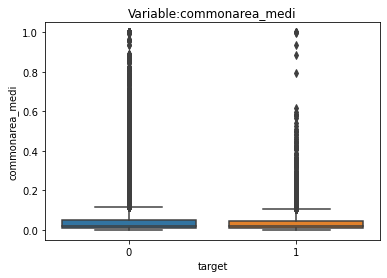

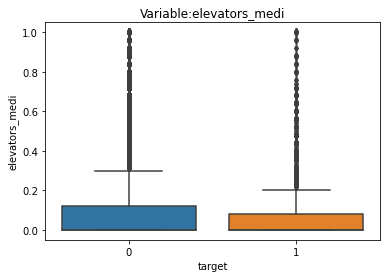

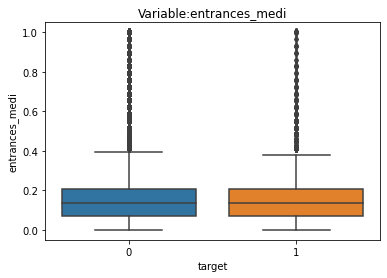

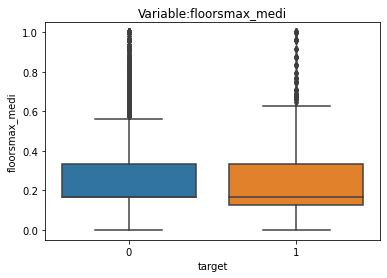

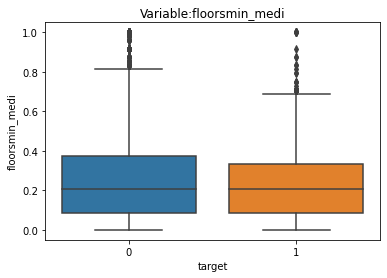

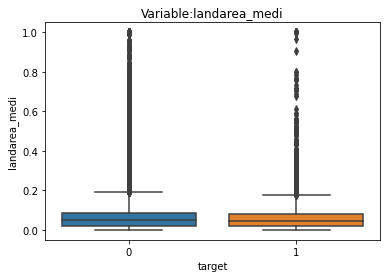

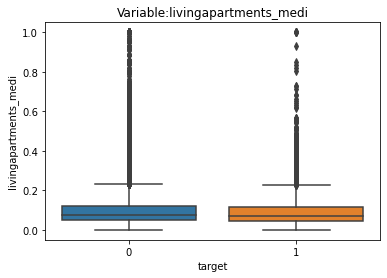

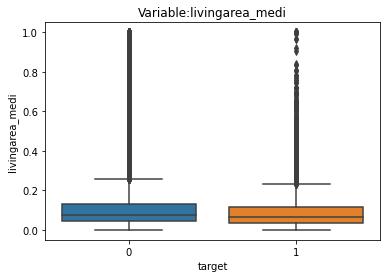

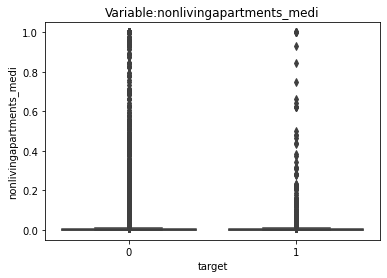

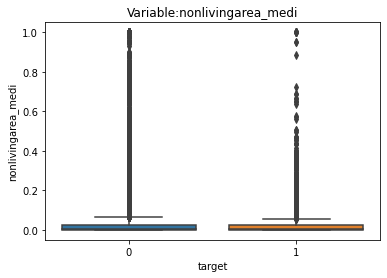

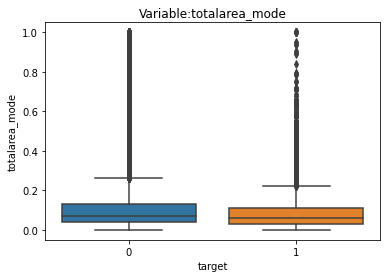

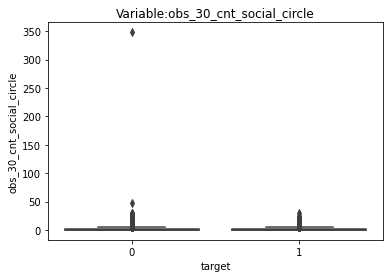

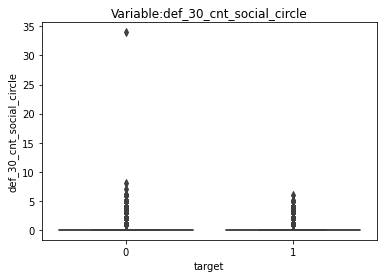

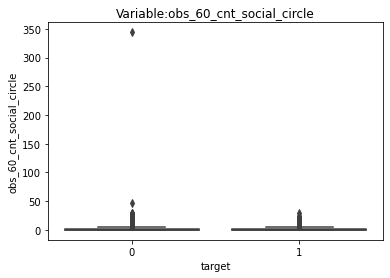

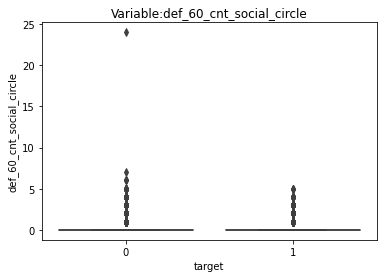

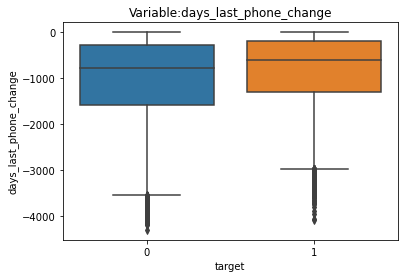

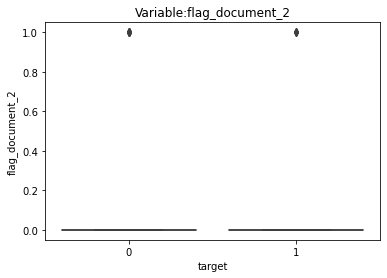

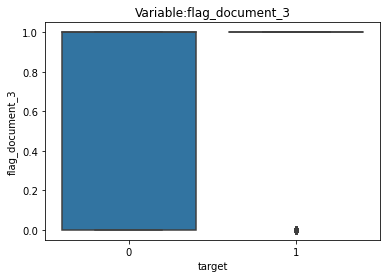

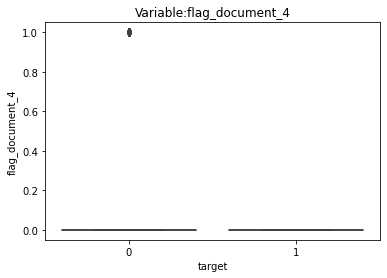

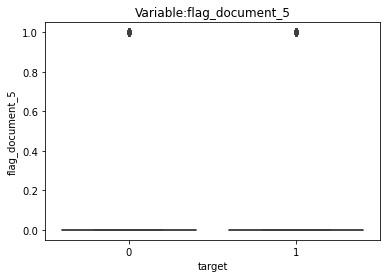

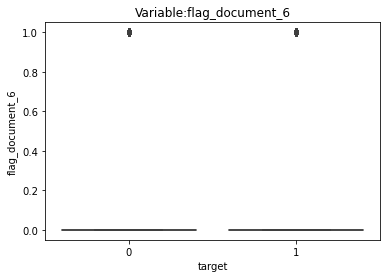

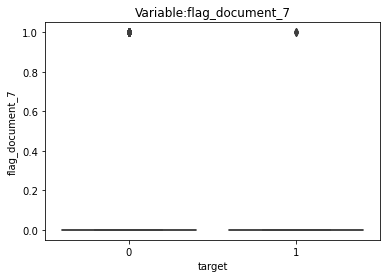

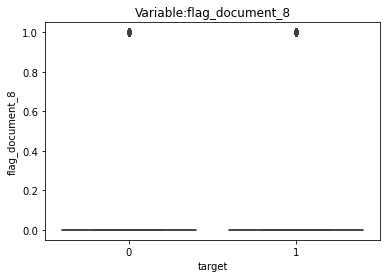

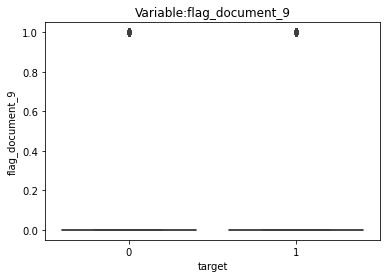

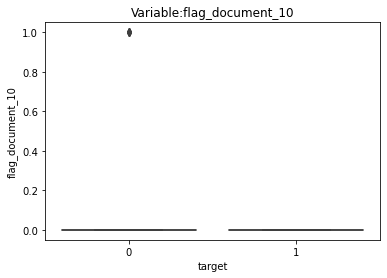

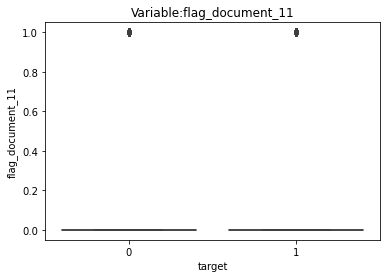

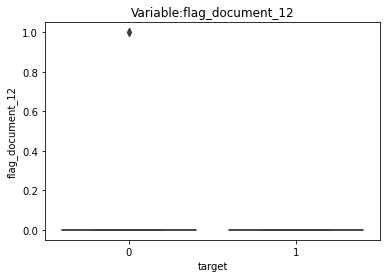

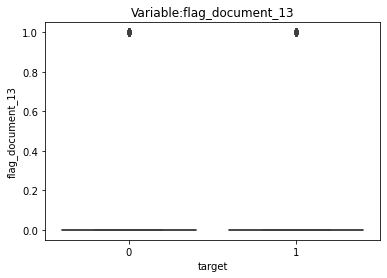

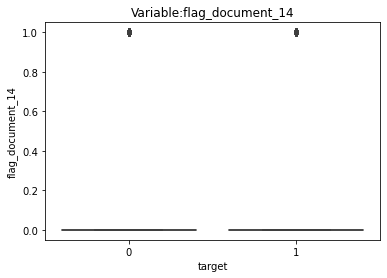

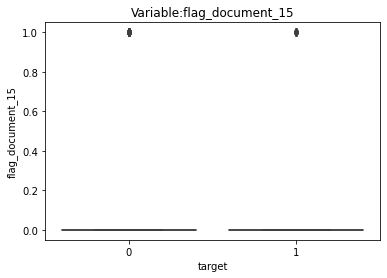

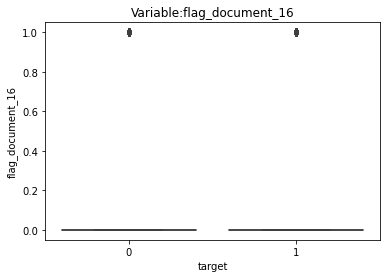

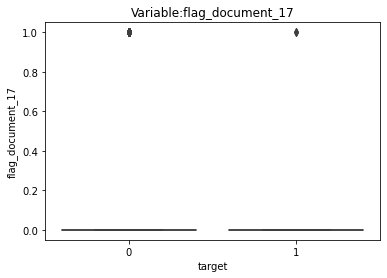

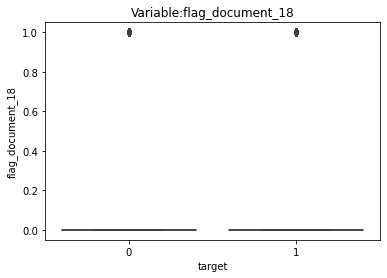

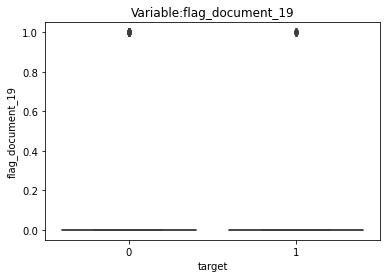

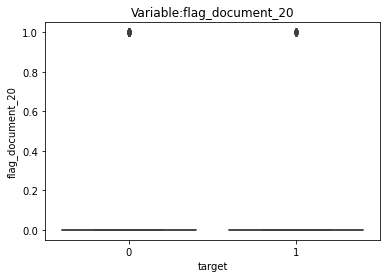

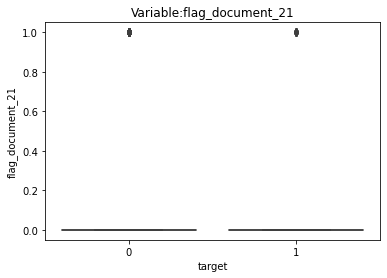

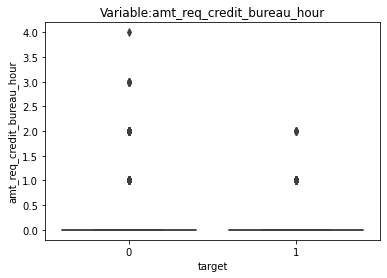

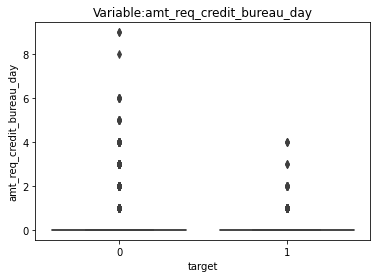

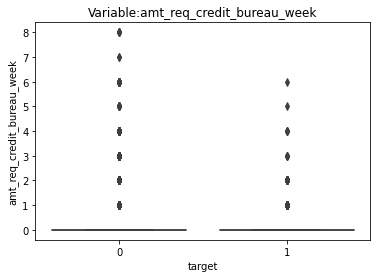

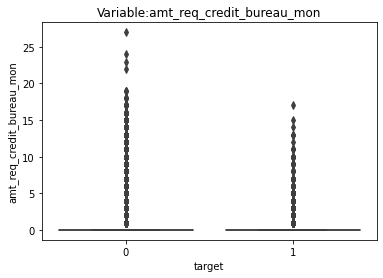

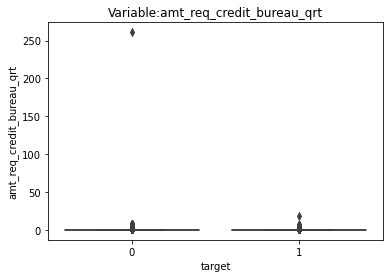

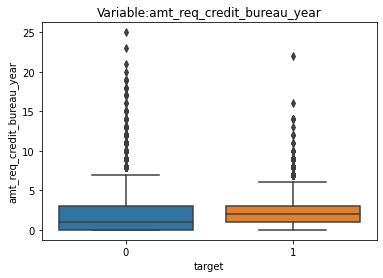

In [17]:
for var in numeric:
    ax = sns.boxplot(x="target", y=var, data=app_train_clean)    
    ax.set_title(f"Variable:{var}")
    plt.show()